In [1]:
# Import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# Import tools from Keras
from keras.datasets import cifar100
from keras.utils import to_categorical, load_img, img_to_array

In [2]:
# Import data from URL
(X_train, Y_train), (X_test, Y_test) = cifar100.load_data()

169001437/169001437 [==============================] - 13s 0us/step


In [3]:
# Data size
print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)

Train set size: (50000, 32, 32, 3)
Test set size: (10000, 32, 32, 3)


**CAUTION:** DON'T MIND ABOUT THE LENGTH OF THIS BLOCK. THEY ARE JUST THE TRUE CLASSES OF THEIR CORRESPONDING NUMERIC CLASSES

In [4]:
# Fine labels of CIFAR100
# Ref. source: https://gist.github.com/adam-dziedzic/4322df7fc26a1e75bee3b355b10e30bc
fine_labels = [
    'apple',  # id 0
    'aquarium_fish',
    'baby',
    'bear',
    'beaver',
    'bed',
    'bee',
    'beetle',
    'bicycle',
    'bottle',
    'bowl',
    'boy',
    'bridge',
    'bus',
    'butterfly',
    'camel',
    'can',
    'castle',
    'caterpillar',
    'cattle',
    'chair',
    'chimpanzee',
    'clock',
    'cloud',
    'cockroach',
    'couch',
    'crab',
    'crocodile',
    'cup',
    'dinosaur',
    'dolphin',
    'elephant',
    'flatfish',
    'forest',
    'fox',
    'girl',
    'hamster',
    'house',
    'kangaroo',
    'computer_keyboard',
    'lamp',
    'lawn_mower',
    'leopard',
    'lion',
    'lizard',
    'lobster',
    'man',
    'maple_tree',
    'motorcycle',
    'mountain',
    'mouse',
    'mushroom',
    'oak_tree',
    'orange',
    'orchid',
    'otter',
    'palm_tree',
    'pear',
    'pickup_truck',
    'pine_tree',
    'plain',
    'plate',
    'poppy',
    'porcupine',
    'possum',
    'rabbit',
    'raccoon',
    'ray',
    'road',
    'rocket',
    'rose',
    'sea',
    'seal',
    'shark',
    'shrew',
    'skunk',
    'skyscraper',
    'snail',
    'snake',
    'spider',
    'squirrel',
    'streetcar',
    'sunflower',
    'sweet_pepper',
    'table',
    'tank',
    'telephone',
    'television',
    'tiger',
    'tractor',
    'train',
    'trout',
    'tulip',
    'turtle',
    'wardrobe',
    'whale',
    'willow_tree',
    'wolf',
    'woman',
    'worm',
]

# Name the numeric classes by using text file
class_names = {}
counter = 0       # For indexing keys

# Add keys and references
for instances in fine_labels:
  class_names.update({counter: instances})   # Add to dictionary
  counter+=1    # Update counter

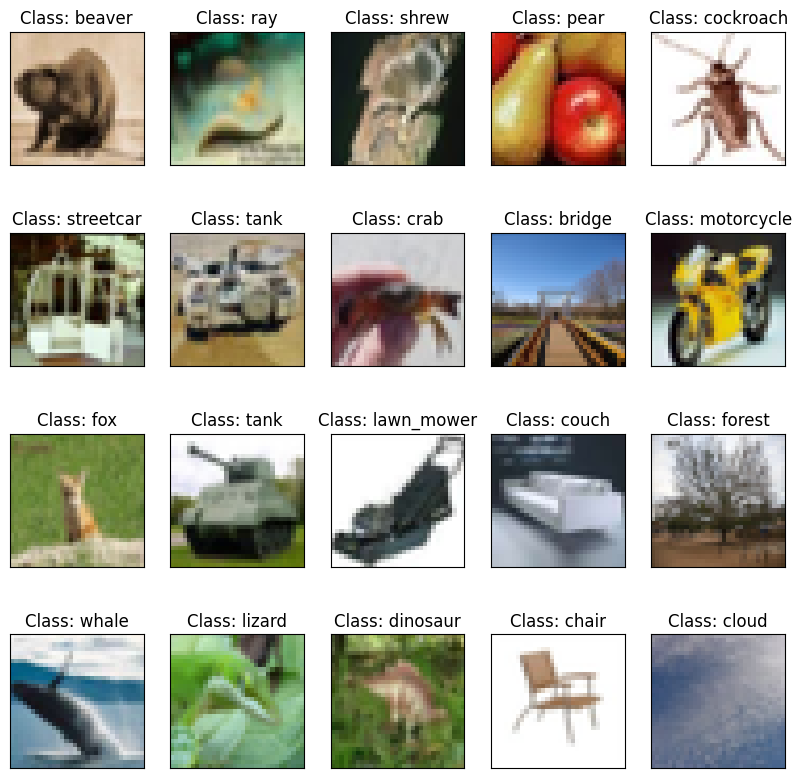

In [5]:
from random import randint

# Display multiple images
fig_display = plt.figure(figsize=[10, 10])
chosen_idx = randint(0, 50000-21)

# Scan image in array
for indx in range(chosen_idx, chosen_idx+20, 1):
  axes = fig_display.add_subplot(4, 5, indx - chosen_idx +1)
  axes.imshow(X_train[indx, :, :])
  axes.set_xticks([ ])
  axes.set_yticks([ ])
  axes.set_title("Class: {}".format(class_names[Y_train[indx,0]]))

In [6]:
# Reshape the sets
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test  = X_test.reshape(X_test.shape[0], 32, 32, 3)

# Rescale within the byte range
X_train_scl = X_train.astype('float32')/255
X_test_scl  = X_test.astype('float32')/255

In [7]:
# One-hot encode the target classes
onehot_train = to_categorical(Y_train)
onehot_test  = to_categorical(Y_test)

# Display some instances
print(onehot_train[:2])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]]


In [8]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Normalization
from keras.layers import LeakyReLU
from keras.optimizers import Adam

In [21]:
# Define constances
batch_size = 64
epochs     = 50
num_class  = 100
in_shape   = (32, 32, 3)

# Create model
model_CNN = Sequential()
  # CNN Layer
model_CNN.add(Conv2D(32, kernel_size=(3,3), activation='linear', input_shape=in_shape, padding='same'))    # 32 times of Conv.
model_CNN.add(Conv2D(32, kernel_size=(3,3), activation='linear', padding='same'))
model_CNN.add(Dropout(0.2))
model_CNN.add(MaxPooling2D(pool_size=(2,2), padding='same'))

model_CNN.add(Conv2D(64, (3, 3), activation='linear', padding='same'))    # 64 times of Conv
model_CNN.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
model_CNN.add(LeakyReLU(alpha=0.1))
model_CNN.add(MaxPooling2D(pool_size=(2,2), padding='same'))

model_CNN.add(Conv2D(128, (3, 3), activation='linear', padding='same'))   # 128 times of Conv
model_CNN.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
model_CNN.add(Dropout(0.2))
model_CNN.add(MaxPooling2D(pool_size=(2,2), padding='same'))

model_CNN.add(Conv2D(256, (3, 3), activation='linear', padding='same'))   # 256 times of Conv
model_CNN.add(Conv2D(256, (3, 3), activation='linear', padding='same'))
model_CNN.add(LeakyReLU(alpha=0.1))
model_CNN.add(MaxPooling2D(pool_size=(2,2), padding='same'))

  # ANN Layer
model_CNN.add(Flatten())
model_CNN.add(Dense(128, activation='linear'))
model_CNN.add(LeakyReLU(alpha=0.1))
model_CNN.add(Dense(num_class, activation='softmax'))

# Summarize model
model_CNN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

In [22]:
from keras.losses import categorical_crossentropy

# Model compile
model_CNN.compile(loss= 'categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model_histo = model_CNN.fit(X_train_scl, onehot_train, batch_size=batch_size, epochs=epochs)

Epoch 1/50
782/782 [==============================] - 10s 11ms/step - loss: 3.8781 - accuracy: 0.1056
Epoch 2/50
782/782 [==============================] - 9s 11ms/step - loss: 3.0360 - accuracy: 0.2496
Epoch 3/50
782/782 [==============================] - 8s 11ms/step - loss: 2.5985 - accuracy: 0.3365
Epoch 4/50
782/782 [==============================] - 9s 11ms/step - loss: 2.3429 - accuracy: 0.3889
Epoch 5/50
782/782 [==============================] - 10s 12ms/step - loss: 2.1471 - accuracy: 0.4321
Epoch 6/50
782/782 [==============================] - 8s 11ms/step - loss: 1.9965 - accuracy: 0.4640
Epoch 7/50
782/782 [==============================] - 9s 11ms/step - loss: 1.8803 - accuracy: 0.4906
Epoch 8/50
782/782 [==============================] - 8s 11ms/step - loss: 1.7912 - accuracy: 0.5108
Epoch 9/50
782/782 [==============================] - 9s 11ms/step - loss: 1.7071 - accuracy: 0.5305
Epoch 10/50
782/782 [==============================] - 9s 11ms/step - loss: 1.6324 - accu

In [23]:
# Model evaluation
test_loss, test_acc = model_CNN.evaluate(X_test_scl, onehot_test, verbose=False)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

Test loss: 5.0816216468811035
Test accuracy: 0.41100001335144043


In [24]:
# Save model
model_CNN.save('/content/drive/MyDrive/Colab Notebooks/Week 10/model_CNN_CIFAR100.h5')

In [ ]:
from keras.models import load_model

model_CNN = load_model('/content/drive/MyDrive/Colab Notebooks/Week 10/model_CNN_CIFAR100.h5')

1/1 [==============================] - 0s 361ms/step
Predicted class: dinosaur


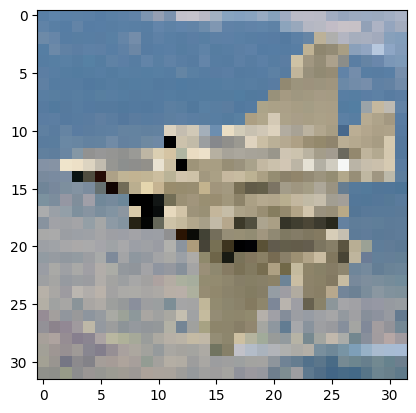

In [25]:
# Test with instances
file_path = '/content/drive/MyDrive/Colab Notebooks/Week 09/A2.PNG'
test_img  = load_img(file_path, color_mode='rgb', target_size=(32, 32))
img_arr   = img_to_array(test_img).reshape(1, 32, 32, 3)/255

class_pred = np.argmax(model_CNN.predict(img_arr))
print("Predicted class:", class_names[class_pred])
plt.imshow(test_img)

1/1 [==============================] - 0s 19ms/step
Predicted class: spider


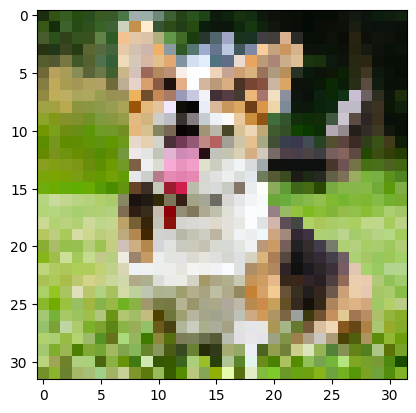

In [26]:
# Test with instances
file_path = '/content/drive/MyDrive/Colab Notebooks/Week 09/A1.PNG'
test_img  = load_img(file_path, color_mode='rgb', target_size=(32, 32))
img_arr   = img_to_array(test_img).reshape(1, 32, 32, 3)/255

class_pred = np.argmax(model_CNN.predict(img_arr))
print("Predicted class:", class_names[class_pred])
plt.imshow(test_img)

1/1 [==============================] - 0s 23ms/step
Predicted class: leopard


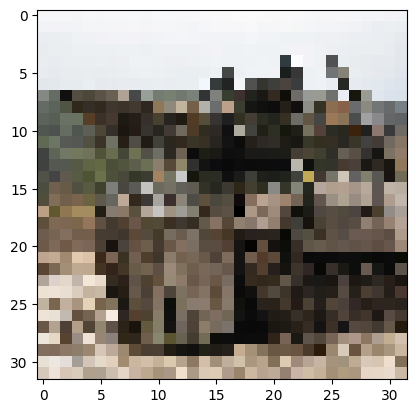

In [27]:
# Test with instances
file_path = '/content/drive/MyDrive/Colab Notebooks/Week 09/A6.jpg'
test_img  = load_img(file_path, color_mode='rgb', target_size=(32, 32))
img_arr   = img_to_array(test_img).reshape(1, 32, 32, 3)/255

class_pred = np.argmax(model_CNN.predict(img_arr))
print("Predicted class:", class_names[class_pred])
plt.imshow(test_img)

What a great trick! This is a picture of a tank named Leopard. The model didn't predict it as a tank, but a leopard instead

**LET'S CREATE A MORE COMPLEX MODEL AND TRAIN IT**

In [35]:
# Create model
model_CNN_deep = Sequential()
  # CNN Layer
model_CNN_deep.add(Conv2D(32, (3, 3), activation='linear', input_shape=in_shape, padding='same'))   # 32 times of Conv
model_CNN_deep.add(Conv2D(32, (3, 3), activation='linear', padding='same'))
model_CNN_deep.add(LeakyReLU(alpha=0.1))
model_CNN_deep.add(MaxPooling2D(pool_size=(2,2), padding='same'))

model_CNN_deep.add(Conv2D(64, kernel_size=(3,3), activation='linear', padding='same'))    # 64 times of Conv.
model_CNN_deep.add(Conv2D(64, kernel_size=(3,3), activation='linear', padding='same'))
model_CNN_deep.add(Dropout(0.1))
model_CNN_deep.add(MaxPooling2D(pool_size=(2,2), padding='same'))

model_CNN_deep.add(Conv2D(128, (3, 3), activation='linear', padding='same'))    # 128 times of Conv
model_CNN_deep.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
model_CNN_deep.add(LeakyReLU(alpha=0.2))
model_CNN_deep.add(MaxPooling2D(pool_size=(2,2), padding='same'))

model_CNN_deep.add(Conv2D(256, (3, 3), activation='linear', padding='same'))   # 256 times of Conv
model_CNN_deep.add(Conv2D(256, (3, 3), activation='linear', padding='same'))
model_CNN_deep.add(Dropout(0.1))
model_CNN_deep.add(MaxPooling2D(pool_size=(2,2), padding='same'))

  # ANN Layer
model_CNN_deep.add(Flatten())
model_CNN_deep.add(Dense(256, activation='relu'))
model_CNN_deep.add(LeakyReLU(alpha=0.1))
model_CNN_deep.add(Dense(128, activation='linear'))
model_CNN_deep.add(LeakyReLU(alpha=0.2))
model_CNN_deep.add(Dense(num_class, activation='softmax'))

# Summarize model
model_CNN_deep.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_57 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 leaky_re_lu_31 (LeakyReLU)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_58 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_59 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

In [36]:
# Model compile
model_CNN_deep.compile(loss= 'categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model_histo_deep = model_CNN_deep.fit(X_train_scl, onehot_train, batch_size=batch_size, epochs=80, validation_data=(X_test_scl, onehot_test))

Epoch 1/80
782/782 [==============================] - 11s 13ms/step - loss: 3.9264 - accuracy: 0.0936 - val_loss: 3.6774 - val_accuracy: 0.1503
Epoch 2/80
782/782 [==============================] - 10s 12ms/step - loss: 3.1271 - accuracy: 0.2294 - val_loss: 3.0750 - val_accuracy: 0.2656
Epoch 3/80
782/782 [==============================] - 9s 12ms/step - loss: 2.7120 - accuracy: 0.3091 - val_loss: 2.7053 - val_accuracy: 0.3303
Epoch 4/80
782/782 [==============================] - 9s 12ms/step - loss: 2.4480 - accuracy: 0.3645 - val_loss: 2.8429 - val_accuracy: 0.3365
Epoch 5/80
782/782 [==============================] - 10s 13ms/step - loss: 2.2545 - accuracy: 0.4046 - val_loss: 2.4965 - val_accuracy: 0.3804
Epoch 6/80
782/782 [==============================] - 9s 11ms/step - loss: 2.0988 - accuracy: 0.4385 - val_loss: 2.4561 - val_accuracy: 0.3945
Epoch 7/80
782/782 [==============================] - 9s 12ms/step - loss: 1.9744 - accuracy: 0.4654 - val_loss: 2.4651 - val_accuracy: 0.4

In [37]:
# Look for information in history
model_histo_deep.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [41]:
# Save this super deep model =))
model_CNN_deep.save('/content/drive/MyDrive/Colab Notebooks/Week 10/model_CNN_deep_CIFAR100.h5')

Text(0.5, 1.0, 'Test Accuracy and Loss')

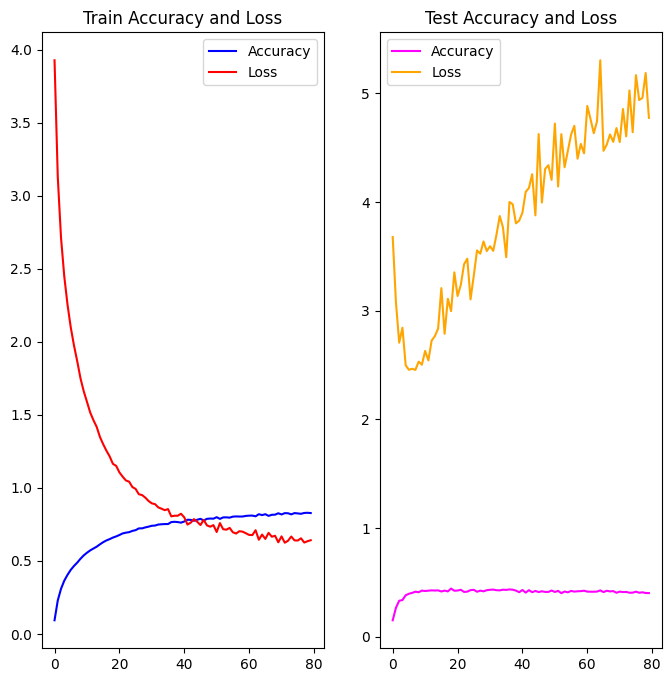

In [45]:
# Model insights
accuracy_lst = model_histo_deep.history['accuracy']
loss_lst     = model_histo_deep.history['loss']
val_loss_lst = model_histo_deep.history['val_loss']
val_accuracy_lst = model_histo_deep.history['val_accuracy']

# Make plot
fig_insight = plt.figure(figsize=[8, 8])
num_epochs = range(len(loss_lst))

axes_01 = fig_insight.add_subplot(1, 2, 1)
axes_01.plot(num_epochs, accuracy_lst, 'b', label='Train Accuracy')
axes_01.plot(num_epochs, loss_lst, 'r', label='Train Loss')
axes_01.legend(['Accuracy', 'Loss'])
axes_01.set_title('Train Accuracy and Loss')

axes_02 = fig_insight.add_subplot(1, 2, 2)
axes_02.plot(num_epochs, val_accuracy_lst, 'magenta', label='Validate Accuracy')
axes_02.plot(num_epochs, val_loss_lst, 'orange', label='Validate Loss')
axes_02.legend(['Accuracy', 'Loss'])
axes_02.set_title('Test Accuracy and Loss')

1/1 [==============================] - 0s 123ms/step
Predicted class: bee


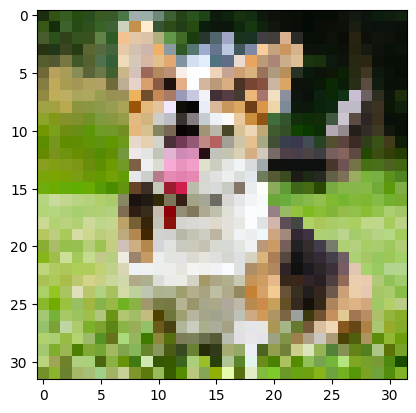

In [46]:
# Test with instances
file_path = '/content/drive/MyDrive/Colab Notebooks/Week 09/A1.PNG'
test_img  = load_img(file_path, color_mode='rgb', target_size=(32, 32))
img_arr   = img_to_array(test_img).reshape(1, 32, 32, 3)/255

class_pred = np.argmax(model_CNN_deep.predict(img_arr))
print("Predicted class:", class_names[class_pred])
plt.imshow(test_img)

Wrong one!

1/1 [==============================] - 0s 28ms/step
Predicted class: tank


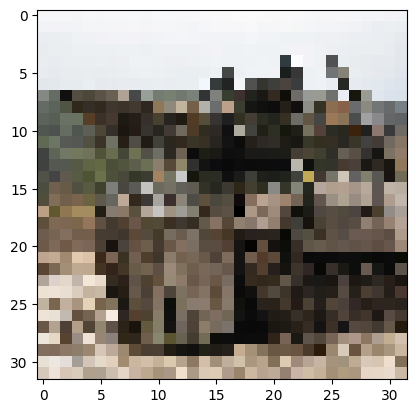

In [47]:
# Test with instances
file_path = '/content/drive/MyDrive/Colab Notebooks/Week 09/A6.jpg'
test_img  = load_img(file_path, color_mode='rgb', target_size=(32, 32))
img_arr   = img_to_array(test_img).reshape(1, 32, 32, 3)/255

class_pred = np.argmax(model_CNN_deep.predict(img_arr))
print("Predicted class:", class_names[class_pred])
plt.imshow(test_img)

Correct one!

1/1 [==============================] - 0s 33ms/step
Predicted class: can


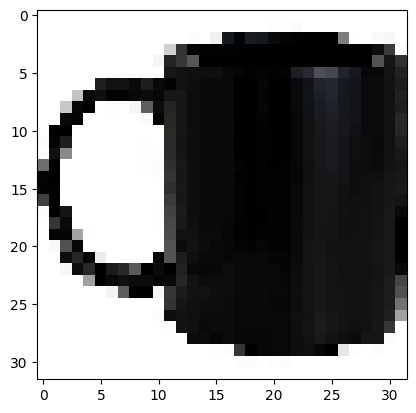

In [51]:
# Test with instances
file_path = '/content/drive/MyDrive/Colab Notebooks/Week 09/coffeemug.png'
test_img  = load_img(file_path, color_mode='rgb', target_size=(32, 32))
img_arr   = img_to_array(test_img).reshape(1, 32, 32, 3)/255

class_pred = np.argmax(model_CNN_deep.predict(img_arr))
print("Predicted class:", class_names[class_pred])
plt.imshow(test_img)

This is a mug, not a can!